<a href="https://colab.research.google.com/github/shanikairoshi/Deep-Unfolded_QML/blob/main/DQSVC_Adhoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit;
!pip install qiskit-machine-learning
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer
from IPython.display import clear_output
clear_output()


QSVC

In [ ]:

# Necessary imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
import csv  # Import CSV for saving results


import pandas as pd

from qiskit_machine_learning.datasets import ad_hoc_data
# pylint: disable=unbalanced-tuple-unpacking
data_train, data_train_labels,data_test, data_test_labels  = (
    ad_hoc_data(training_size=50,
                test_size=15,
                n=2,
                gap=0.3,
                one_hot=False))


# Variables to track objective function and learning rate
objective_func_vals = []
learning_rates = []
perturbations = []
initial_learning_rate = 0.15  # Starting learning rate
initial_perturbation = 0.15  # Starting perturbation value
momentum = 0.95  # Momentum factor for smoother learning rate adjustments
gradient_moving_avg = 0  # Moving average of gradients


# Define quantum feature map and ansatz
feature_dim = data_train.shape[1]
prep = ZZFeatureMap(feature_dim, reps=2)



import matplotlib.pyplot as plt
import numpy as np


feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
print(feature_map.num_qubits)

qsvc=QSVC(quantum_kernel=kernel)
#t0=time()
qsvc.fit(data_train, data_train_labels)
qsvc_score=qsvc.score(data_test, data_test_labels )
print(f"QSVC classification test score: {qsvc_score}")
qsvc_scoretrain=qsvc.score(data_test, data_test_labels )
print(f"QSVC classification train score: {qsvc_scoretrain}")

qsvc_scoretrain=qsvc.score(data_test, data_test_labels )
print(f"QSVC classification train score: {qsvc_scoretrain}")
#print(f"Time taken :{t1-t0}")

<ipython-input-2-c5b299fa5353>:52: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


2
QSVC classification test score: 1.0
QSVC classification train score: 1.0
QSVC classification train score: 1.0


<ipython-input-17-320fd57fb2cb>:30: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Iteration 1/10
Cost at iteration 1: -1.856887242744513
Gradient norm at iteration 1: 50.9375191876991
Alpha update norm at iteration 1: 0.28218274183803943
Phi update norm at iteration 1: 0.051563673453740376
QSVC accuracy at iteration 1: 1.0
Phis at iteration 1: [-0.2510141  -0.09386155 -0.03438769  0.0066958   0.04778254 -0.05251306
  0.09327968  0.02720144  0.0520793   0.07063666  0.03491856 -0.06905142
 -0.07673012 -0.02958904 -0.01776943  0.07841207 -0.10345286  0.06772515
 -0.15265587  0.00794335  0.10472997  0.17428227  0.12774748  0.00515197
  0.16694198  0.16488873 -0.01443447  0.08021294  0.08522848  0.08353087
 -0.01470147 -0.02052336 -0.2197229   0.14317932  0.14245657 -0.0308073
  0.04087513  0.02435173 -0.02109133 -0.0391915  -0.00856282  0.0666035
 -0.07216012  0.0191899  -0.05051196 -0.02176173  0.02987898 -0.10871342
 -0.05937549 -0.14709397 -0.06821418 -0.074318    0.05483691 -0.07007655
 -0.18534764  0.04502906 -0.03043539  0.05948815  0.05679563 -0.06897302
 -0.1766

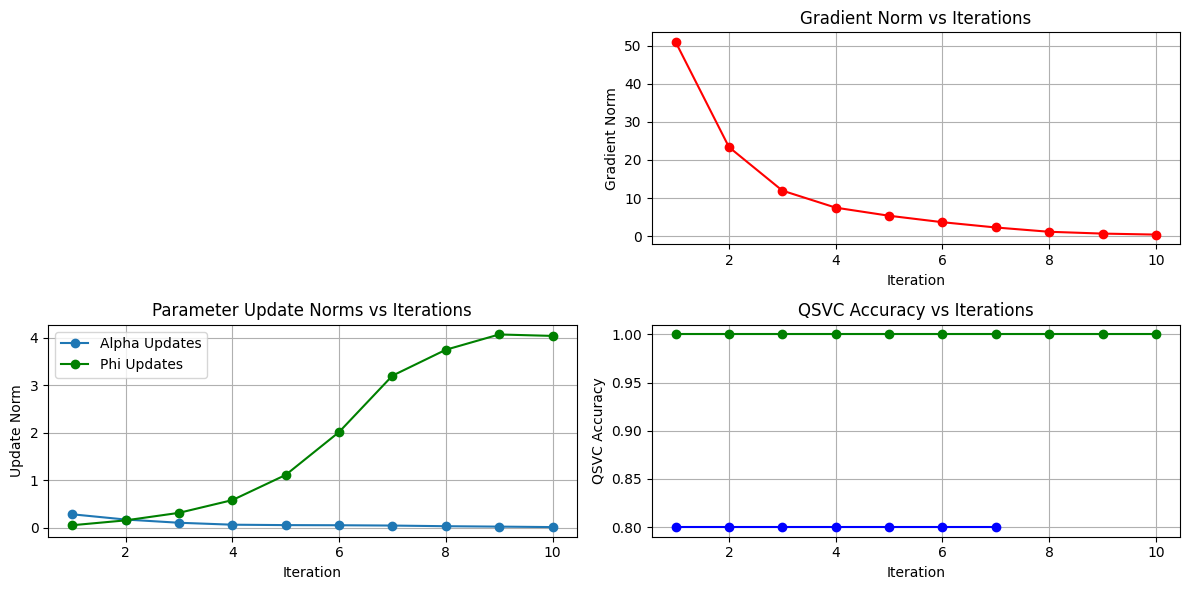

"\n\nfrom qiskit import Aer\nfrom qiskit.primitives import Sampler\n\n# Specify the backend explicitly (if needed)\nbackend = Aer.get_backend('qasm_simulator')\n\n# Create the sampler with the specified backend\nsampler = Sampler(backend=backend)\n"

In [ ]:
# Necessary imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
import csv  # Import CSV for saving results

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Split dataset into training and test sets

#train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1, random_state=seed)
#data_train, data_train_labels,data_test, data_test_labels
# Quantum feature map
feature_dim = 4  # Dimension of features in iris dataset
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 1.0  # Regularization parameter
eta = 0.01  # Learning rate
eta_phi = 0.01  # Learning rate for phis
alphas = np.zeros(data_train_labels.shape)  # Initialize alpha coefficients
phis = np.random.randn(data_train_labels.shape[0])  # Initialize unfolding parameters

# Define the cost function gradient with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Define the update rule for alphas based on deep unfolding
def update_alphas(alphas, grad, phis, eta):
    # Alphas update modulated by phis
    return alphas - eta * grad * np.tanh(phis)  # Phis influence the alpha update step

# Construct the quantum kernel matrix
kernel_matrix = kernel.evaluate(data_train)

# Initialize alphas and phis with small random values
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1  # Small random initialization for alphas
phis = np.random.randn(data_train_labels.shape[0]) * 0.1  # Small random initialization for phis

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

# Define the gradient of cost with respect to phis
def compute_gradient_wrt_phi(grad_alpha, phis):
    # Placeholder: Approximate influence of phis on the alpha update step
    return np.dot(grad_alpha, phis)  # Simplified dependency

# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the headers for each column
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])


# Add lists to track the gradient norms, parameter update norms, and classification accuracy
grad_norms = []
alpha_update_norms = []
phi_update_norms = []
accuracies = []

# Track costs for visualization
costs = []

# Initialize previous values of alphas and phis for tracking updates
previous_alphas = np.copy(alphas)
previous_phis = np.copy(phis)

# Deep unfolding optimization loop with updates and learning rate adjustment
for t in range(T):
    print(f"Iteration {t+1}/{T}")

    # Compute the gradient of the cost function with respect to alphas
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)

    # Compute gradient norm
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas using deep unfolding rule where phis modulate the update step
    alphas = update_alphas(alphas, grad_alpha, phis, eta)

    # Ensure constraints are met: 0 <= alpha_i <= C
    alphas = np.clip(alphas, 0, C)

    # Ensure sum(alpha_i * y_i) = 0 constraint (more robust adjustment)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    # Compute the gradient of the cost function with respect to phis
    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)

    # Update phis based on the gradient of the cost
    phis -= eta_phi * grad_phi

    # Compute parameter update norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Store the current values of alphas and phis for the next iteration
    previous_alphas = np.copy(alphas)
    previous_phis = np.copy(phis)

    # Compute and store the cost for this iteration
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Adjust the learning rate dynamically based on gradient norms (deep unfolding principle)
    eta = max(0.001, eta + 0.001 * np.linalg.norm(grad_alpha))  # Adjust eta dynamically
    eta_phi = max(0.001, eta_phi + 0.001 * np.linalg.norm(grad_phi))  # Adjust eta_phi dynamically

    # After the current iteration, fit the QSVC model and evaluate its accuracy
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test, data_test_labels)
    accuracies.append(accuracy)

    # Save the results to the .csv file after each iteration
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis])


    print(f"Cost at iteration {t+1}: {cost}")
    print(f"Gradient norm at iteration {t+1}: {grad_norm}")
    print(f"Alpha update norm at iteration {t+1}: {alpha_update_norm}")
    print(f"Phi update norm at iteration {t+1}: {phi_update_norm}")
    print(f"QSVC accuracy at iteration {t+1}: {accuracy}")
    print(f"Phis at iteration {t+1}: {phis}")

# After deep unfolding, use the final alphas to train the QSVC model
qsvc.fit(data_train, data_train_labels)

# Evaluate QSVC
dqsvc_score_test = qsvc.score(data_test, data_test_labels)
print(f"DSVC classification test score after deep unfolding: {dqsvc_score_test}")

dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"DQSVC classification test score after deep unfolding: {dqsvc_score_train}")

# Plotting the cost values over the iterations
plt.figure(figsize=(12, 6))

# Plot gradient norm over iterations
plt.subplot(2, 2, 2)
plt.plot(range(1, len(grad_norms) + 1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

# Plot alpha and phi update norms over iterations
plt.subplot(2, 2, 3)
plt.plot(range(1, len(alpha_update_norms) + 1), alpha_update_norms, marker='o', label='Alpha Updates')
plt.plot(range(1, len(phi_update_norms) + 1), phi_update_norms, marker='o', label='Phi Updates', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.title('Parameter Update Norms vs Iterations')
plt.legend()
plt.grid(True)

# Plot classification accuracy over iterations
plt.subplot(2, 2, 4)
qsvc_accuracies = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]  # Placeholder for baseline QSVC accuracies
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o',  color='g', label="D-QSVC")
plt.plot(range(1, len(qsvc_accuracies) + 1), qsvc_accuracies, marker='o', color='b', label="QSVC")
plt.xlabel('Iteration')
plt.ylabel('QSVC Accuracy')
plt.title('QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

'''

from qiskit import Aer
from qiskit.primitives import Sampler

# Specify the backend explicitly (if needed)
backend = Aer.get_backend('qasm_simulator')

# Create the sampler with the specified backend
sampler = Sampler(backend=backend)
'''
